### Welcome to the Euler-Maruyama ReCoDe project!

Before going into the details of SDEs, the EM method and how to code it, we need to refresh a bit of `numpy` and `matplotlib` libraries. These are the basic libraries we will use to implement the EM method and numerically solve an SDE.

#### `Numpy` review

Recall that `numpy` is a Python package for numerical computing and array manipulation. Therefore, we can use `numpy` to define arrays (vectors) which store numbers and operate with them. Below, we provide basic examples to remember 
the advantages of using `numpy`.

In [1]:
import numpy as np

# First, we define a 1-D numpy array
x = np.array([1, 2, 3, 4, 5, 6])
print("x: ", x)

x:  [1 2 3 4 5 6]


In [2]:
# We can check the shape of the array
print("x shape: ", x.shape)

x shape:  (6,)


In [3]:
# We can define multidimensional arrays
y = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("y: \n", y)
print("y shape: ", y.shape)

y: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
y shape:  (3, 3)


In [4]:
# Perfom element-wise mathematical operations is easy
x2 = x + 2
x3 = x * 2
x4 = x ** 2  # square
print("x2: ", x2)
print("x3: ", x3)
print("x4: ", x4)

x2:  [3 4 5 6 7 8]
x3:  [ 2  4  6  8 10 12]
x4:  [ 1  4  9 16 25 36]


In [5]:
# We can also operate with several arrays
x5 = x[::-1]  # this operation reverses the x array
x6 = x - x5
print("x6: ", x6)

x6:  [-5 -3 -1  1  3  5]


In [6]:
x7 = np.array([-1, -1, 0, 0, 1, 1])
x8 = x * x7  # this applies the element-wise product
print("x8: ", x8)

# We can also define vectorial product
y2 = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]])
y3 = np.dot(y, y2)  # this will be equivalent to y3 = y @ y2
print("y3: \n", y3)

x8:  [-1 -2  0  0  5  6]
y3: 
 [[2 2 2]
 [5 5 5]
 [8 8 8]]


In [7]:
# We can redefine the shape of an array
x_reshaped = x.reshape(1, -1)  # from (6, ) to (1, 6)
x7_reshaped = x7.reshape(-1, 1) # from (6, ) to (6, 1)
x9 = np.dot(x7_reshaped, x_reshaped)
print("x9: \n", x9)
print("x9 shape: ", x9.shape)

x9: 
 [[-1 -2 -3 -4 -5 -6]
 [-1 -2 -3 -4 -5 -6]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  2  3  4  5  6]
 [ 1  2  3  4  5  6]]
x9 shape:  (6, 6)


In [8]:
# Antoher useful function is stacking arrays
x10 = np.stack([x, x], axis=0) 
print("x10: \n", x10)
print("x10 shape: ", x10.shape)

x11 = np.stack([x, x], axis=1)
print("x11: \n", x11)
print("x11 shape: ", x11.shape)

x10: 
 [[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
x10 shape:  (2, 6)
x11: 
 [[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
x11 shape:  (6, 2)


In [9]:
# There is a number of pre-implemented mathematical functions
x_mean = np.mean(x)
print("x mean: ", x_mean)

y_col_mean = np.mean(y, axis=0)
y_row_mean = np.mean(y, axis=1)
print("y column mean: ", y_col_mean)
print("y row mean: ", y_row_mean)

x_exp = np.exp(x)
print("exp(x) :\n", x_exp)

x_log = np.log(x)
print("log(x) :\n", x_log)

y_sqrt = np.sqrt(y)
print("sqrt(y) :\n", y_sqrt)

x mean:  3.5
y column mean:  [4. 5. 6.]
y row mean:  [2. 5. 8.]
exp(x) :
 [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591
 403.42879349]
log(x) :
 [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947]
sqrt(y) :
 [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]


That concludes the brief `numpy` review. 

#### `Matplotlib` review

Another useful library for our purposes is `matplotlib`. It is a comprehensive data visualisation package. Hence, we can use matplotlib to plot figures containing distinct types of charts based on the numerical results stored in `numpy`.

Text(0.5, 1.0, 'sin, cos')

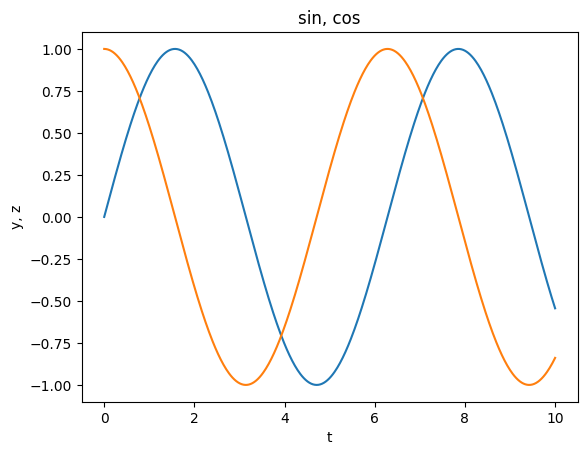

In [10]:
import matplotlib.pyplot as plt

# We can plot a line using numpy arrays
x = np.linspace(0, 10, 500)  # this generates 500 equally-spaced values between 0 and 10
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)
ax.set_xlabel("t")
ax.set_ylabel("y, z")
ax.set_title("sin, cos")

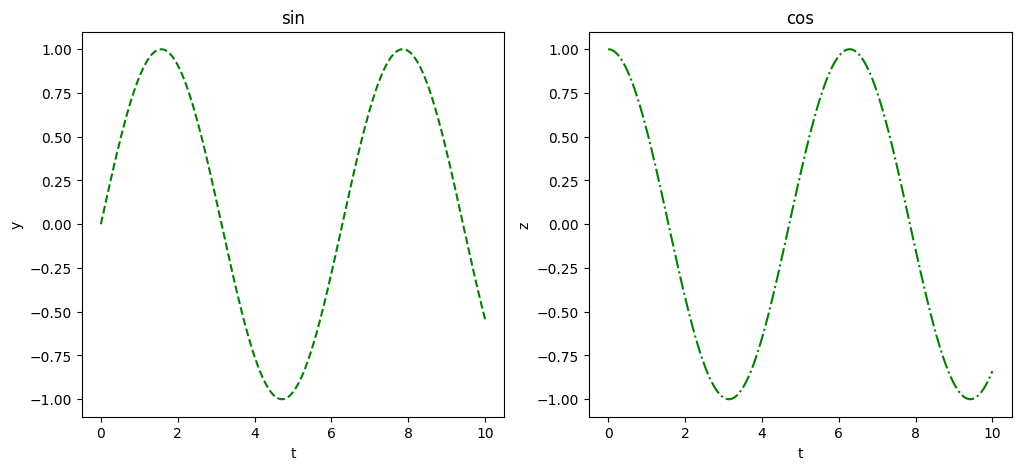

In [11]:
# Or in different graphs
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))  # this indicates 1 row and 2 columns of graphs

ax0.plot(x, y, color="green", ls="--")
ax0.set_xlabel("t")
ax0.set_ylabel("y")
ax0.set_title("sin")

ax1.plot(x, z, color="green", ls="-.")
ax1.set_xlabel("t")
ax1.set_ylabel("z")
ax1.set_title("cos")

plt.show()

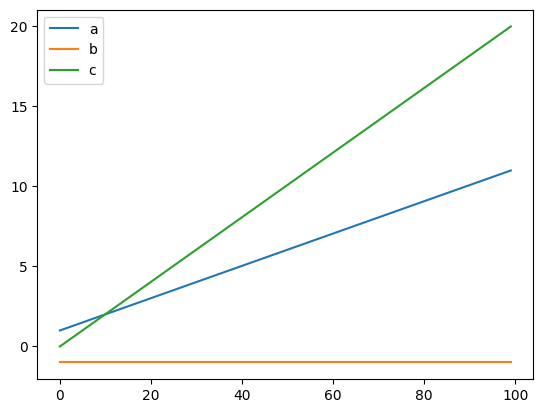

In [12]:
# Plotting multiple arrays

x = np.linspace(0, 10, 100)
y_ones = np.ones_like(x)  # this generates an array of 1s with the same shape than x
y = np.stack([y_ones] * 3)  # y shape: (3, 100)
y[0, :] = y[0, :] + x   # sum x to the first row 
y[1, :] = y[1, :] * (-1)  # multiply the second row by (-1) 
y[2, :] = y[2, :] * 2*x  # multiply the third row by x 
y = y.T  # transpose the array, y shape: (100, 3)

fig, ax = plt.subplots()
ax.plot(y)
ax.legend(["a", "b", "c"])
plt.show()

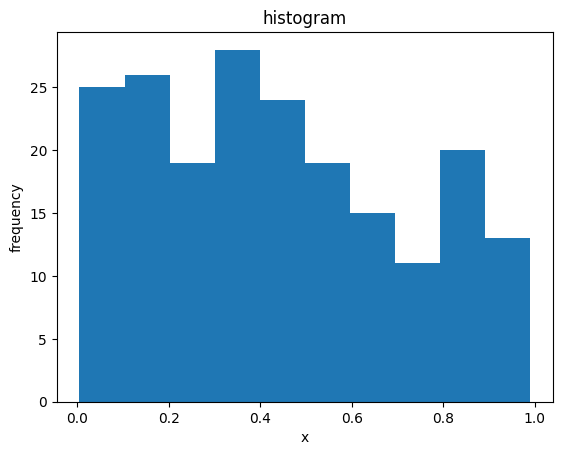

In [13]:
# Histograms are useful plots
x = np.random.rand(200)  # this function gives us 200 random values between 0 and 1

fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel("x")
ax.set_ylabel("frequency")
ax.set_title("histogram")

plt.show()

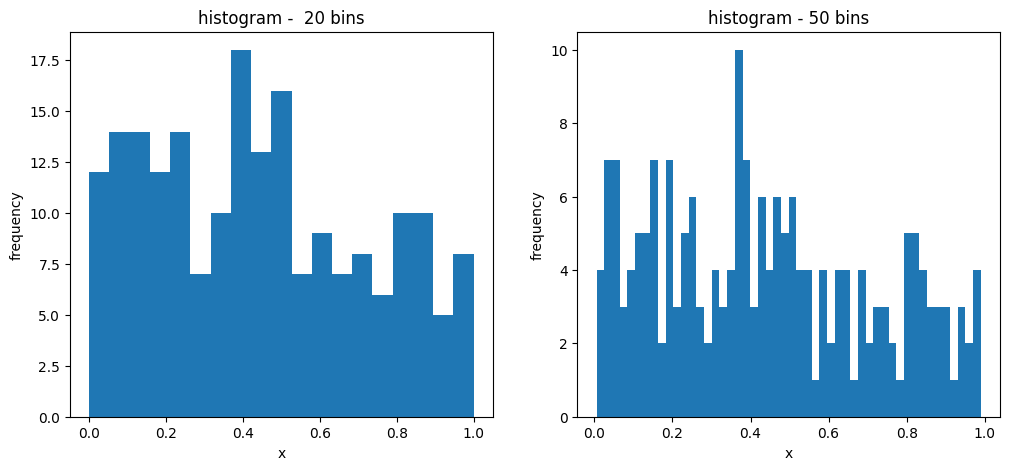

In [14]:
# We can define the bins used in the histograms

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))

ax0_bins = np.linspace(0, 1, 20)  # 20 bins equally-spaced between 0 and 1
ax0.hist(x, bins=ax0_bins)
ax0.set_xlabel("x")
ax0.set_ylabel("frequency")
ax0.set_title("histogram -  20 bins")

ax1_bins = 50  # 50 bins
ax1.hist(x, bins=ax1_bins)
ax1.set_xlabel("x")
ax1.set_ylabel("frequency")
ax1.set_title("histogram - 50 bins")

plt.show()

### B) Random number generation, sampling and probability distributions

In this section, we review basic concepts about random number generation, sampling and probability distributions. These concepts are essential to understand and implement the EM method for solving SDEs. Our aim is to map these basic fundamentals to `numpy` and `matplotlib` manipulation.

#### B.1 Random number generation

Random numbers are essential to perfom simulations and study random variables and stochatic processes. The generation of random numbers allows us to implement an *apparently* randomness and unpredicted behaviour in our experiments. Considering a collection of random numbers, we can effectively incorporate uncertainty and variability into real-world applications, enabling the application modelling and assessment in a probabilistic manner. 

Note the word *apparently* above. We have highlighted it because we want to emphasise that the random number generation is *not so* random. In fact, modern computers and software packages allows us to draw a collection of random numbers that seems random. However, there is always an underlying deterministic algorithm generating this collection. Therefore, from a theoretical point of view, the generated numbers have an underlying pattern. Nevertheless, for most applications, the obtained numbers collection if sufficiently random to utilise them in our simulations to mimic a random behaviour. One of the advantages of these *pseudo-random* number generation algorithms is that they provide consistency and replicability. With these *pseudo-random* algorithms, we can computationally repeat a random simulation as many times as we want without obtaining a different collection of random numbers that might difficult our analysis of the simulated experiment. 

We proceed showing how to manipulate random numbers collection with `numpy`.

In [92]:
# Pick a single random number between [0, 1), running this cell multiple times gives us different outcomes
random_number = np.random.random()
print("Random number: ", random_number)

Random number:  0.43915701403233653


In [93]:
# We can also generate an array of random numbers
random_array = np.random.random(size=5)
print("Random array: ", random_array)

# Or generate another sequence with different conditions
random_integer_array = np.random.randint(low=0, high=10, size=10) # Pick 10 random integers between [0, 10)
print("Random integer array: ", random_integer_array)

Random array:  [0.77551588 0.62869062 0.09799092 0.65158606 0.96861601]
Random integer array:  [3 4 7 0 4 5 7 9 3 4]


In [94]:
# Each call produces a different sequence as commented above
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

random_array_2 = np.random.random(size=5)
print("Random array 2: ", random_array_2)

Random array 1:  [0.01752226 0.80858507 0.31023432 0.77338003 0.14480914]
Random array 2:  [0.20600547 0.28706552 0.58965416 0.88553733 0.10072286]


In [95]:
# However, for replicability purposes we can fix the random numbers we obtain.
# This is done by setting the random seed, i.e., the initial state of the underlying generator algorithm

np.random.seed(seed=14)
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

np.random.seed(seed=14)  # Executing this line before generating the random numbers, ensures the same sequence.
random_array_2 = np.random.random(size=5)
print("Random array 2: ", random_array_2)

Random array 1:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]
Random array 2:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]


In [96]:
# And it can be called at any time
np.random.seed(seed=14)
random_array_1 = np.random.random(size=5)
print("Random array 1: ", random_array_1)

random_array_2 = np.random.random(size=10)
print("Random array 2: ", random_array_2)

# do other stuff.. 

np.random.seed(seed=14)
random_array_3 = np.random.random(size=5)
print("Random array 3: ", random_array_3)

Random array 1:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]
Random array 2:  [0.95760374 0.51311671 0.31828442 0.53919994 0.22125494 0.80648136
 0.34225463 0.53888885 0.00587379 0.67315248]
Random array 3:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593]


#### B.2 Sampling

In the previous subsection, we had generated collections of random numbers. Under the hood, this generation involves sampling from a distribution or population. Hence, we were drawing random samples without noticing. Random sampling is the process of choosing a subset of items from a larger population following a predefined probability of choosing a particular item. In some scenarios, like the random samples drawn in the previous section, each item has the same probability, meaning that each item has an equal chance to be included in the sample. Random sampling is useful to make inferences about the entire population or distribution based on the characteristics observed in the sample.

Below, we implement small pieces of code using `numpy` to highlight the importance of random sampling.

In [101]:
# Sampling from an array
population = np.array([1, 2, 3, 4, 5])
sample = np.random.choice(population, size=3)
print("Random sample using choice: ", sample)

Random sample using choice:  [1 5 1]


In [102]:
# The previous example is equivalent to use directly
sample = np.random.randint(low=1, high=6, size=3)  # Draw 3 integer numbers between [1, 6)
print("Random sample using randint: ", sample)

Random sample using randint:  [2 1 4]


In [115]:
# In the previous samples, each number [1, 2, 3, 4, 5] had the same chance of being selected (1/5)
# However, we can specificy a specific chance for each item
# Note how 5 appears more frequently
chances = [0.1, 0.1, 0.1, 0.2, 0.5]  # must sum 1
uneven_sample = np.random.choice(population, size=30, p=chances)
print("Uneven sample: ", uneven_sample)

Uneven sample:  [5 4 4 5 5 5 4 4 3 5 1 5 1 5 5 5 5 5 5 3 4 4 4 5 4 5 5 4 5 3]


Number of appearances:  {'1': 2, '2': 0, '3': 3, '4': 9, '5': 16}


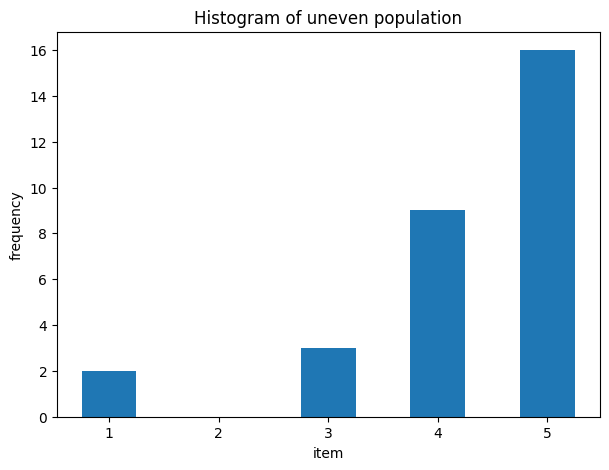

In [134]:
# We can count the number of appearances of each item
counter = {str(k): 0 for k in population}
for i in uneven_sample:
    counter[str(i)] += 1

print("Number of appearances: ", counter)

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(uneven_sample, bins=[0.75, 1.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
ax.set_xlabel("item")
ax.set_ylabel("frequency")
ax.set_title("Histogram of uneven population")

plt.show()

As mentioned earlier, random sampling is useful to infer information from the population. Let us consider the following experiments in which we have a bag containing **100** coloured marbles: **60** <span style="color:red">red</span>, **35** <span style="color:green">green</span> and **5** <span style="color:blue">blue</span>. Let us assume that we do not know that there are **100** marbles nor how many of them are of each colour. Thus, random sampling comes to our rescue. Assuming that each marble has equally chance of being selected, we can pick a random marble from the bag, annotate its colour and return the chosen marble to bag. By running a *very large* sample, we can infer the colour proportion inside the bag. Let us code it!   

In [169]:
# First we define the population
red = np.array(["red"] * 60)
green = np.array(["green"] * 35)
blue = np.array(["blue"] * 5)
population = np.concatenate([red, green, blue], axis=0)
population = np.random.permutation(population)  # we mix them to avoid any bias

# Now we sample from the population
n_samples = 500
marble_sample = np.random.choice(population, size=n_samples)

Number of coloured marbles:  {'red': 294, 'green': 185, 'blue': 21}


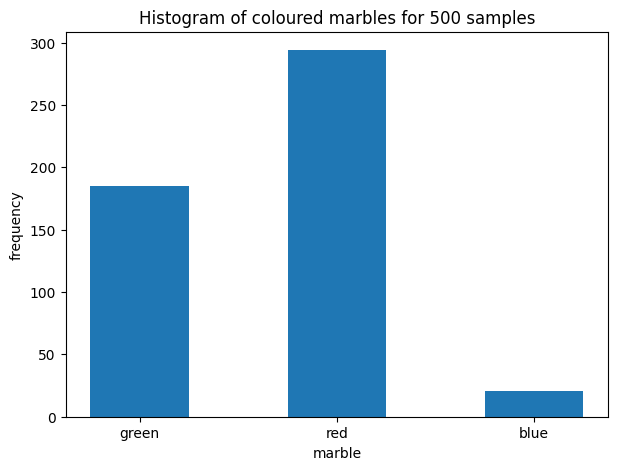

In [170]:
# We can count the number of coloured marbles choosen
marble_counter = {k: 0 for k in ["red", "green", "blue"]}
for i in marble_sample:
    marble_counter[i] += 1

print("Number of coloured marbles: ", marble_counter)

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(marble_sample, bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25])
ax.set_xlabel("marble")
ax.set_ylabel("frequency")
ax.set_title(f"Histogram of coloured marbles for {n_samples} samples")

plt.show()

In [171]:
# Thus, we can estimate the proportion of marbles inside the bag 
# and see it approximates to the real values {red: 0.6, green: 0.35, blue: 0.05}
marble_proportion = {k: v/n_samples for k, v in marble_counter.items()}
print(f"Marble proportion for {n_samples} samples: ", marble_proportion)

Marble proportion for 500 samples:  {'red': 0.588, 'green': 0.37, 'blue': 0.042}


We see that the experiment for 500 samples yields an approximate proportion close to the real numbers. However, the differences between our experiment and the real values arise because 500 samples might not be a sufficiently good estimation for this problem. Theoretically, if the number of samples tends to infinity, we can recover the true underlying proportion. In order to understand this implication, we compute the marble proportion as we draw more and more marbles, showing the marble proportion with respect to the number of samples.

In [216]:
# We repeat the experiment for a very long run of samples 
long_n_samples = 4_000
long_marble_sample = np.random.choice(population, size=long_n_samples)

In [217]:
# Create a 2D numpy array where the rows (i) are each marble colour and the columns (j) represent each ordinal sample
colour_samples = np.zeros(shape=(3, long_n_samples))

# Fill with 1 if the marble colour i has been picked up in sample j
colour_samples[0, :] = np.where(long_marble_sample == "red", 1, 0)
colour_samples[1, :] = np.where(long_marble_sample == "green", 1, 0)
colour_samples[2, :] = np.where(long_marble_sample == "blue", 1, 0)

# Apply cumulative sum all marbles along the sampling direction
colour_samples = colour_samples.cumsum(axis=1, dtype=int)

# Divde each column by its ordinal sampling to obtain the proportion
ord_samples = np.arange(1, long_n_samples+1)
colour_proportion_samples = colour_samples / ord_samples

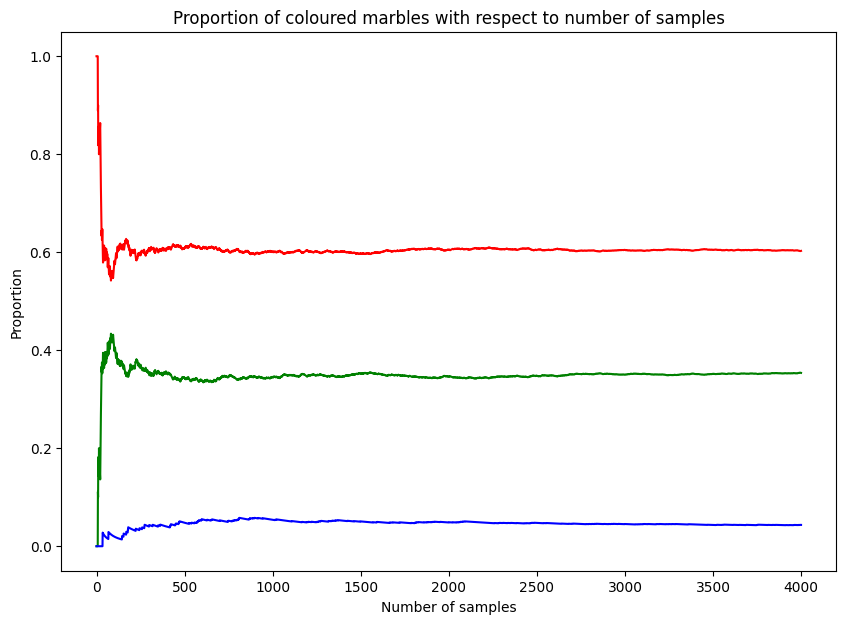

In [218]:
# Plot the proportion evolution with respect to the number of samplings
from cycler import cycler

fig, ax = plt.subplots(figsize=(10, 7))

c = ["red", "green", "blue"]
custom_c = cycler(color=c)
ax.set_prop_cycle(custom_c)
ax.plot(colour_proportion_samples.T)

ax.set_xlabel("Number of samples")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of coloured marbles with respect to number of samples")

plt.show()

We see how as the number of samples increases, the experimental proportion converges to the real values. In the limit, when the number of samples tends to infinity, the proportion of <span style="color:red">red</span>, <span style="color:green">green</span> and <span style="color:blue">blue</span> marbles will be equal to true proportion value.

This concept of the true proportion as the number of samples is *really large* is an intuitive notion of the concept of probability. Yet it is slightly vague, since we cannot formally define the probability based on a *really large number*. Depending on the experiment, 1000 might be a really large number while for other experiments it might be insufficient. For a more detailed and mathematical explanation of probability see **[link]**. However, this brief example has helped us to build an approximation to the concept of probability and how to sample from a population of distribution. In the next section we introduce the notion of probability distributions.

#### B.3 Probability distributions

Once we have grasped an intuition about probability, we can introduce the notion of distributions. A **probability distribution** is a mathematical function indicating the likelihood of different possible outcomes in an experiment. Thanks to the distribution, we can quantify the probabilities related to each possible outcomes. Generally speaking, we have a probability distribution associated with a random variable, i.e. we say that a random variable $X$ follows a probability distribution. A random variable is essentially a real-value function that assigns a numerical value to each possible outcome of the experiment. There are two types of random variables: discrete and continuous. A random variable is discrete if its range (the possible outcomes of the experiment) is a countable set. Conversely, a random variable is continuous if its range is in the form of an interval on the real line $\mathbb{R}$. Considering a random variable describing the random marble draw from the bag in the previous section, it is discrete since the range is a countable set (red $R$, green $G$ or blue $B$): $\{R, G, B\}$, while a random variable describing tomorrow's temperature $T$ is continuous given that the temperature might be, for example, any real number between $[-5°, 36°]$.
Hereinafter, we restrict our attention to continuous random variables.

Continuous probability distributions are described by **probability density functions** (PDFs), $f_{X}(x)$. PDFs represent the relative likelihood of the random variable taking on different values within a given interval. We mention here a given interval, since talking about probability of an specific value is meaningless in the context of continuous random variables. Going back to our previous temperature example, this means that the probability of observing tomorrow's temperature at 16° is zero, which is represented mathematically as $P(T = 16°) = 0$. In this case, we are more interested in the probability of tomorrow's temperature above or below a given threshold or between an interval, e.g., $P(T > 30°), P(T < 20°)$ or $P(12 < T \leq 22)$. The area under the mathematical function representing the PDF over an given interval indicates the probability of such interval. Hence, knowing the PDF expresion, we can compute the area under the curve to obtain the associated probability of a particular interval. If we consider the whole range of the random variable, its area under the PDF must be equal to 1, because the probability 
of all possible outcomes of the experiment is 1.

The concept of PDF also applies to discrete random variables. However, in this case the probability of a particular value or item is nonzero. Consider the marbles example of the previous subsection, being $Y$ the random variable of choosing a random marble from the bag. From the set of possible outcomes $\{R, G, B\}$, we know that $P(Y=R) = 0.6, \, P(Y = G) = 0.35, \, P(Y = B) = 0.05$, with this discrete PDF summing 1.

Often, we are interested in statistical properties of a random variable $X$. These statistical quantities provide useful information to determine the behaviour of $X.$ Here, we focus on two important features, the **expected value** and the **variance**. The expected value is the mean, the average of the random varibales. It is calculated as the probability-weighted average of the values in the range of the random varibale and denoted commonly as $\mathbb{E}[X]$. On the other hand, the variance $Var(X)$ informs about how spread out the distribution of the random variable is with respect to the mean value. Mathematically, it is calculated as the expected value of the squared difference between the random variable and its mean, $Var(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]$. 

Many measured quantities of natural and social phenomena can take any value within a certain interval and can be modelled following a particular PDF. Depending on the measured quantity features or the underlying phenomena, the related PDF will have a different shape and properties. We can find numerous examples of continuous probability distributions such as the normal (Gaussian), exponential or uniform distribution. Each distribution has its own mathematical function that yields different PDF shape, making them suitable for different types of real-world applications. Below, we introduce some of the most typical distribution we might encounter and how they are implemented in `numpy`.

#### Uniform distribution

\begin{equation}
\nonumber f_X(x) = \left\{
\begin{array}{l l}
\frac{1}{b-a} & \quad a < x < b\\
0 & \quad x < a \textrm{ or } x > b
\end{array} \right.
\end{equation}

\begin{align}
\mathbb{E}[X] = \frac{a+b}{2} \quad Var(X) = \frac{(b-a)^2}{12}
\end{align}


This distribution appears when we can choose any real number uniformly in the range $[a, b]$. Uniformly implies that all subintervals within $[a, b]$ that have equivalent length must have the same probability. In the graph below, the green line represents the theoretical PDF, while the blue histogram is a collection of random samples taken from the uniform distribution which is already implemented in `numpy`.

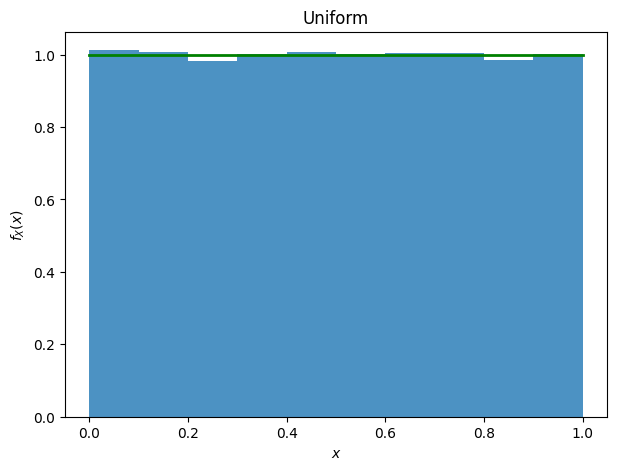

In [61]:
a = 0  # lower bound
b = 1  # upper bound
# This draws 100_000 random samples following a uniform distribution
random_uniform = np.random.uniform(a, b, size=100_000)

x = np.linspace(0, 1, 100)
uniform_function = np.ones_like(x) * 1/(b-a)

fig, ax = plt.subplots(figsize=(7, 5))
# density=True renormalise the height of the histogram so that the area under the histogram is 1, i.e. a PDF
ax.hist(random_uniform, density=True, alpha=.8)
ax.plot(x, uniform_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Uniform")
plt.show()

#### Normal (Gaussian) distribution

\begin{equation}
f_X(x) = \frac{1}{\sqrt{2 \pi}} \exp\left\{-\frac{x^2}{2}\right\}, \hspace{20pt} \textrm{for all } x \in \mathbb{R}
\end{equation}

\begin{align}
\mathbb{E}[X] = 0 \quad Var(X) = 1
\end{align}

This well-known distribution is represented through a symmetric PDF that resembles a bell-shape curve. It is often used to model measurements that concentrates around a central value, with fewer observations falling away of this central value. The central value is knwon as the mean $\mu$, while the dispersion with respect to the mean is knwon as the standard deviation $\sigma$. In the equation above, $\mu=0$ and $\sigma=1$, which is called a standard normal distribution $\mathcal{N}(0, 1)$. In the graph below, the green line represents the theoretical PDF, while the blue histogram is a collection of random samples taken from the normal distribution implemented in `numpy`.

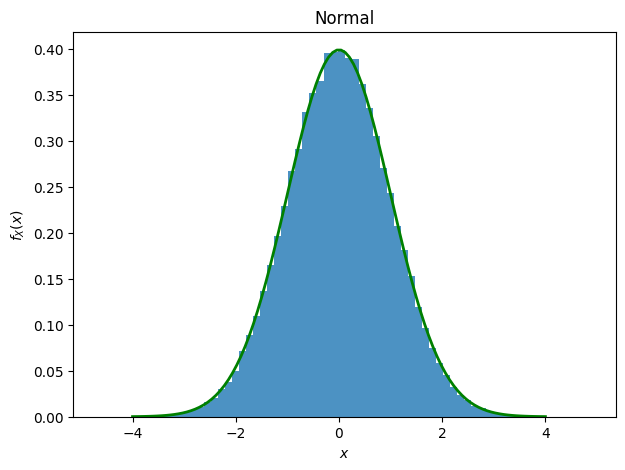

In [64]:
mu = 0  # mean
sigma = 1  # standard deviation
random_normal = np.random.normal(mu, sigma, size=100_000)

x = np.linspace(-4, 4, 100)
normal_function = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(random_normal, density=True, bins=70, alpha=.8)
ax.plot(x, normal_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Normal")
plt.show()

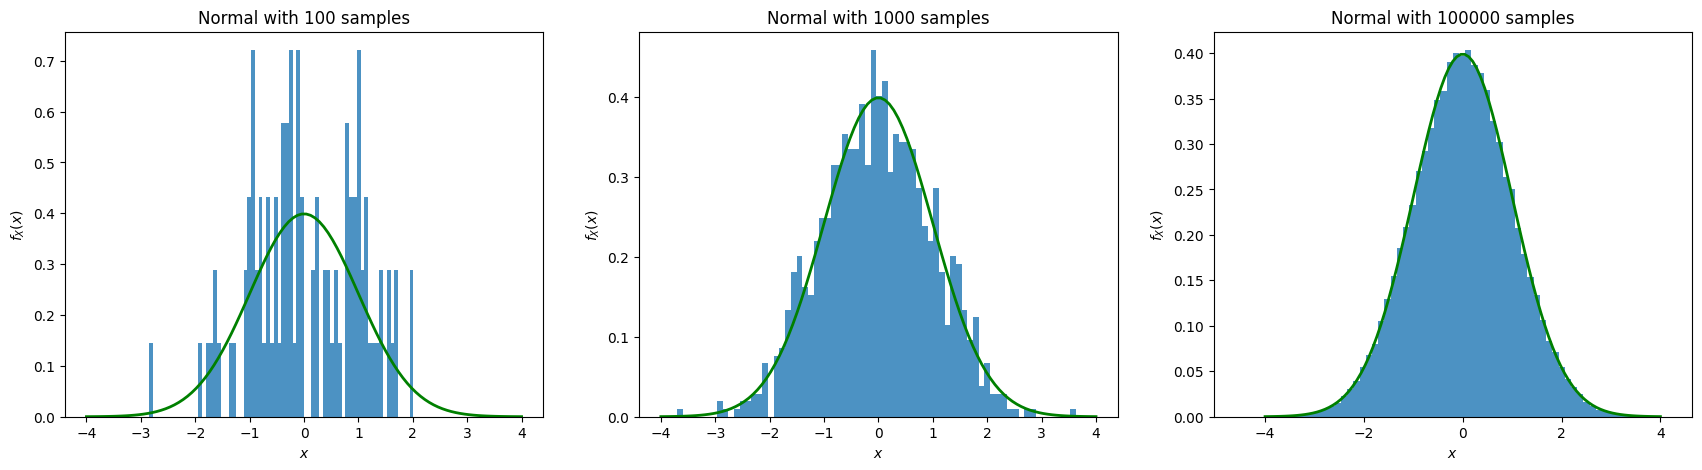

In [220]:
# Note how increasing the number of samples drawn yields a better approximation to the theoretical function
random_normal_1 = np.random.normal(mu, sigma, size=100)
random_normal_2 = np.random.normal(mu, sigma, size=1_000)
random_normal_3 = np.random.normal(mu, sigma, size=100_000)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(21, 5))

ax0.hist(random_normal_1, density=True, bins=70, alpha=.8)
ax0.plot(x, normal_function, color="green", lw=2)
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$f_{X}(x)$")
ax0.set_title("Normal with 100 samples")

ax1.hist(random_normal_2, density=True, bins=70, alpha=.8)
ax1.plot(x, normal_function, color="green", lw=2)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$f_{X}(x)$")
ax1.set_title("Normal with 1000 samples")

ax2.hist(random_normal_3, density=True, bins=70, alpha=.8)
ax2.plot(x, normal_function, color="green", lw=2)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$f_{X}(x)$")
ax2.set_title("Normal with 100000 samples")

plt.show()

When a random variable $X$ follows a standard normal distribution $(\mu=0, \sigma=1)$, it is represented as $X \sim \mathcal{N}(0, 1)$. An important property of normal random variables is that we can always represent any normal distribution in terms of the standard normal distribution. We only have to shift and scale the standard normal distribution:

\begin{align}
Z &= \sigma X + \mu \\
f_Z(z)&=\frac{1}{ \sigma\sqrt{2 \pi}} \exp\left\{-\frac{(z-\mu)^2}{2\sigma^2}\right\}, \hspace{20pt} \textrm{for all } z \in \mathbb{R}
\end{align}

\begin{align}
\mathbb{E}[Z] = \mu \quad Var(Z) = \sigma^2
\end{align}

$Z$ is normal distibution with mean $\mu$ and standard variation $\sigma$, i.e. $Z \sim \mathcal{N}(\mu, \sigma^2)$. Below, we compare two different normal distributions.

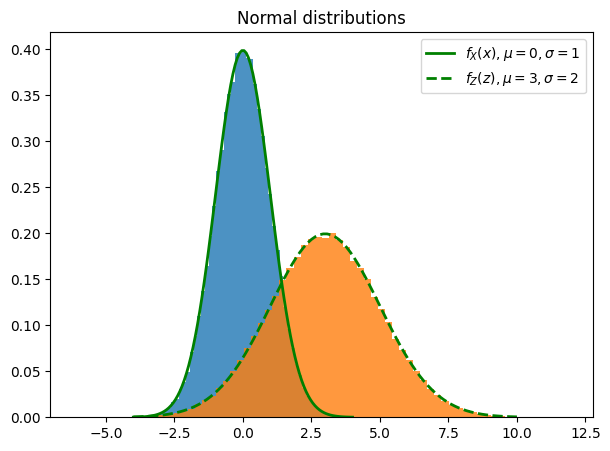

In [72]:
mu_2 = 3  # mean
sigma_2 = 2  # standard deviation
random_normal_2 = np.random.normal(mu_2, sigma_2, size=100_000)

z = np.linspace(-4, 10, 100)
normal_function_2 = 1/(sigma_2 * np.sqrt(2*np.pi)) * np.exp(-(z - mu_2)**2/ (2*sigma_2**2))

fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(random_normal, density=True, bins=70, alpha=.8)
ax.plot(x, normal_function, color="green", lw=2, label=r"$f_{X}(x), \mu = 0, \sigma =1$")

ax.hist(random_normal_2, density=True, bins=70, alpha=.8)
ax.plot(z, normal_function_2, color="green", lw=2, ls='--', label=r"$f_{Z}(z), \mu = 3, \sigma = 2$")

ax.set_title("Normal distributions")
ax.legend()
plt.show()

#### Exponential distribution

\begin{equation}
\nonumber f_X(x) = \left\{
\begin{array}{l l}
\lambda e^{-\lambda x} & \quad x > 0\\
0 & \quad \textrm{otherwise}
\end{array} \right.
\end{equation}

\begin{align}
\mathbb{E}[X] = \frac{1}{\lambda} \quad Var(X) = \frac{1}{\lambda^2}
\end{align}

The exponential distribution is widely used to model the time elapsed between events. It is governed by the parameter $\lambda$, called the rate parameter. Intuitively, a lower the rate parameter $\lambda$ results in a longer average time between events as seen in the expected value. In the next figure, we show a comparison between the theoretical PDF (green line) and an ensemble of random samples drawn from the `numpy` implementation of the exponential distribution.

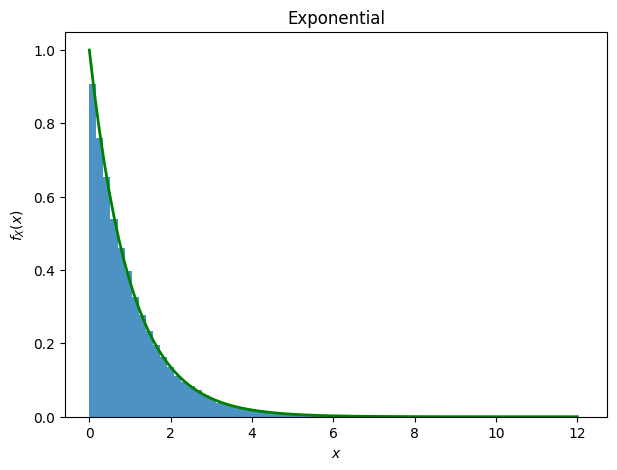

In [59]:
l = 1 #
random_exponential = np.random.exponential(scale=l, size=100_000)

x = np.linspace(0, 12, 100)
exponential_function = np.exp(-x)

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(random_exponential, density=True, bins=70, alpha=.8)
ax.plot(x, exponential_function, color="green", lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f_{X}(x)$")
ax.set_title("Exponential")
plt.show()